In [1]:
import pandas as pd
import numpy as np
import sqlite3

import Pmf
import Cdf

import dill

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
class DillSerializer:
   
    def __init__(self, path):
        self.path = path
   
    def serialize(self, obj, protocol_version=2):
        f = open(self.path, "wb+")
        dill.dump(obj, f, protocol_version)
        f.close()
       
    def deserialize(self):
        f = open(self.path, "rb")
        data = dill.load(f)
        f.close()
        return data

In [3]:
cdn_assets_by_page_cdf = DillSerializer('[...PATH...]/dills/per-page-cdfs/num_cdn_assets_per_page.dill').deserialize()
non_cdn_assets_by_page_cdf = DillSerializer('[...PATH...]/dills/per-page-cdfs/num_non_cdn_assets_per_page.dill').deserialize()
total_assets_by_page_cdf = DillSerializer('[...PATH...]/dills/per-page-cdfs/num_total_assets_per_page.dill').deserialize()
cdn_pen_by_page = DillSerializer('[...PATH...]/dills/per-page-cdfs/cdn_pen_per_page.dill').deserialize()

In [4]:
import glob

In [5]:
cdn_assets_by_page_cdf = DillSerializer('[...PATH...]/dills/per-page-cdfs/num_cdn_assets_per_page.dill').deserialize()
total_assets_by_page_cdf = DillSerializer('[...PATH...]/dills/per-page-cdfs/num_total_assets_per_page.dill').deserialize()
cdn_pen_by_page = DillSerializer('[...PATH...]/dills/per-page-cdfs/cdn_pen_per_page.dill').deserialize()

In [6]:
num_cdn_cdf = DillSerializer('[...PATH...]/dills/num_cdn_cdf.dill').deserialize()
num_cdn_bp_with_cdn_cdf = DillSerializer('[...PATH...]/dills/num_cdn_bp_with_cdn_cdf.dill').deserialize()
num_cdn_bp_without_cdn_cdf = DillSerializer('[...PATH...]/dills/num_cdn_bp_without_cdn_cdf.dill').deserialize()

In [7]:
base_page_cdfs = []
for d in glob.glob('[...PATH...]/dills/base-pages/*.dill'):
    base_page_cdfs.append((d.split('/')[-1][:-5], DillSerializer(d).deserialize()))

base_page_cdfs = dict(base_page_cdfs)

In [8]:
base_page_cdfs

{'scores_no_cdn': <Cdf.Cdf at 0x7f8169541fd0>,
 'cdn_pen_cdn': <Cdf.Cdf at 0x7f8169541940>,
 'assets_total_cdn': <Cdf.Cdf at 0x7f8169541f60>,
 'cdn_assets_cdn': <Cdf.Cdf at 0x7f8169541f98>,
 'non_cdn_assets_no_cdn': <Cdf.Cdf at 0x7f8169241128>,
 'scores_cdn': <Cdf.Cdf at 0x7f8169241160>,
 'non_cdn_assets_cdn': <Cdf.Cdf at 0x7f8169241198>,
 'cdn_assets_no_cdn': <Cdf.Cdf at 0x7f81692411d0>,
 'cdn_pen_no_cdn': <Cdf.Cdf at 0x7f8169241208>,
 'assets_total_no_cdn': <Cdf.Cdf at 0x7f8169241240>}

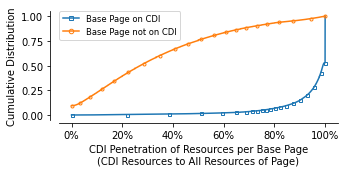

In [9]:
cdf_fig, cdf_ax = plt.subplots(figsize = (5, 2))

cdf_ax.plot(base_page_cdfs['cdn_pen_cdn'].xs, base_page_cdfs['cdn_pen_cdn'].ps,
                label = 'Base Page on CDI',
                marker = 's',
#                 linewidth = 0.5,
                markersize = 3,
#                 markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'C0',
                markevery = int(len(base_page_cdfs['cdn_pen_cdn'].xs)/20)
              )

cdf_ax.plot(base_page_cdfs['cdn_pen_no_cdn'].xs, base_page_cdfs['cdn_pen_no_cdn'].ps,
                label = 'Base Page not on CDI',
                marker = 'o',
#                 linewidth = 0.5,
                markersize = 3,
#                 markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'C1',
                markevery = int(len(base_page_cdfs['cdn_pen_no_cdn'].xs)/20)
              )

# PLOT FORMATTING
# customize axes and grid appearance
cdf_ax.set_title('')
cdf_ax.legend(loc = 'lower right', markerscale = 1.5, fontsize = 'small', bbox_to_anchor=(0.45,0.7))
cdf_ax.set_xlabel('CDI Penetration of Resources per Base Page\n(CDI Resources to All Resources of Page)')
cdf_ax.set_ylabel('Cumulative Distribution')
cdf_ax.grid(False)
cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))

vals = cdf_ax.get_xticks()
cdf_ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

cdf_fig.savefig('[...PATH...]/plots/pen-per-page-cdf.pdf', bbox_inches = 'tight')

plt.show()

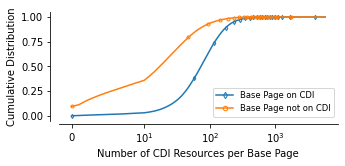

In [10]:
cdf_fig, cdf_ax = plt.subplots(figsize = (5, 2))

cdf_ax.plot(base_page_cdfs['cdn_assets_cdn'].xs, base_page_cdfs['cdn_assets_cdn'].ps,
                label = 'Base Page on CDI',
                marker = 'd',
                #linewidth = 0.5,
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'C0',
                markevery = int(len(base_page_cdfs['cdn_assets_cdn'].xs)/20)
              )

cdf_ax.plot(base_page_cdfs['cdn_assets_no_cdn'].xs, base_page_cdfs['cdn_assets_no_cdn'].ps,
                label = 'Base Page not on CDI',
                marker = 'o',
                #linewidth = 0.5,
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'C1',
                markevery = int(len(base_page_cdfs['cdn_assets_no_cdn'].xs)/20)
              )

# PLOT FORMATTING
# customize axes and grid appearance
cdf_ax.set_title('')
cdf_ax.legend(loc = 'lower right', markerscale = 1.5, fontsize = 'small')
cdf_ax.set_xlabel('Number of CDI Resources per Base Page')
cdf_ax.set_ylabel('Cumulative Distribution')
cdf_ax.set_xscale('symlog', linthresh=10)
cdf_ax.grid(False)
cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))

cdf_fig.savefig('[...PATH...]/plots/base-page-plots/cdn-assets.pdf', bbox_inches = 'tight')

plt.show()

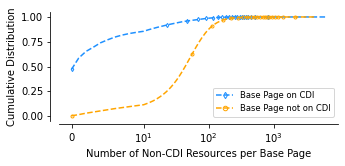

In [11]:
cdf_fig, cdf_ax = plt.subplots(figsize = (5, 2))

cdf_ax.plot(base_page_cdfs['non_cdn_assets_cdn'].xs, base_page_cdfs['non_cdn_assets_cdn'].ps,
                label = 'Base Page on CDI',
                marker = 'd',
                #linewidth = 0.5,
                linestyle = '--',
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'dodgerblue',
                markevery = int(len(base_page_cdfs['non_cdn_assets_cdn'].xs)/20)
              )

cdf_ax.plot(base_page_cdfs['non_cdn_assets_no_cdn'].xs, base_page_cdfs['non_cdn_assets_no_cdn'].ps,
                label = 'Base Page not on CDI',
                marker = 'o',
                #linewidth = 0.5,
                linestyle = '--',
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'orange',
                markevery = int(len(base_page_cdfs['non_cdn_assets_no_cdn'].xs)/20)
              )

# PLOT FORMATTING
# customize axes and grid appearance
cdf_ax.set_title('')
cdf_ax.legend(loc = 'lower right', markerscale = 1.5, fontsize = 'small')
cdf_ax.set_xlabel('Number of Non-CDI Resources per Base Page')
cdf_ax.set_ylabel('Cumulative Distribution')
cdf_ax.set_xscale('symlog', linthresh=10)
cdf_ax.grid(False)
cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))

cdf_fig.savefig('[...PATH...]/plots/base-page-plots/non-cdn-assets.pdf', bbox_inches = 'tight')

plt.show()

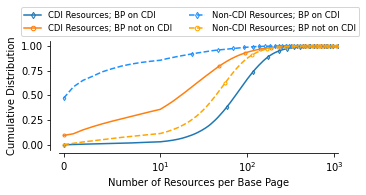

In [12]:
cdf_fig, cdf_ax = plt.subplots(figsize = (5, 2))

cdf_ax.plot(base_page_cdfs['cdn_assets_cdn'].xs, base_page_cdfs['cdn_assets_cdn'].ps,
                label = 'CDI Resources; BP on CDI',
                marker = 'd',
                #linewidth = 0.5,
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'C0',
                markevery = int(len(base_page_cdfs['cdn_assets_cdn'].xs)/20),
              )

cdf_ax.plot(base_page_cdfs['cdn_assets_no_cdn'].xs, base_page_cdfs['cdn_assets_no_cdn'].ps,
                label = 'CDI Resources; BP not on CDI',
                marker = 'o',
                #linewidth = 0.5,
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'C1',
                markevery = int(len(base_page_cdfs['cdn_assets_no_cdn'].xs)/20),
              )

cdf_ax.plot(base_page_cdfs['non_cdn_assets_cdn'].xs, base_page_cdfs['non_cdn_assets_cdn'].ps,
                label = 'Non-CDI Resources; BP on CDI',
                marker = 'd',
                #linewidth = 0.5,
                linestyle = '--',
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'dodgerblue',
                markevery = int(len(base_page_cdfs['non_cdn_assets_cdn'].xs)/20),
              )

cdf_ax.plot(base_page_cdfs['non_cdn_assets_no_cdn'].xs, base_page_cdfs['non_cdn_assets_no_cdn'].ps,
                label = 'Non-CDI Resources; BP not on CDI',
                marker = 'o',
                #linewidth = 0.5,
                linestyle = '--',
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'orange',
                markevery = int(len(base_page_cdfs['non_cdn_assets_no_cdn'].xs)/20),
              )

# PLOT FORMATTING
# customize axes and grid appearance
cdf_ax.set_title('')
cdf_ax.legend(loc = 'upper left', markerscale = 1.5, ncol=2, fontsize = 'small', bbox_to_anchor=(-.15, 1.35))
cdf_ax.set_xlabel('Number of Resources per Base Page')
cdf_ax.set_ylabel('Cumulative Distribution')
cdf_ax.set_xscale('symlog', linthresh=10)
cdf_ax.grid(False)
cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))
cdf_ax.set_xlim([-0.5, 1100])

cdf_fig.savefig('[...PATH...]/plots/base-page-plots/assets.pdf', bbox_inches = 'tight')

plt.show()

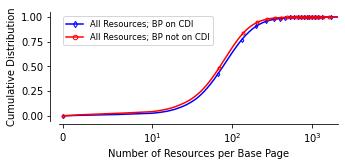

In [13]:
cdf_fig, cdf_ax = plt.subplots(figsize = (5, 2))

cdf_ax.plot(base_page_cdfs['assets_total_cdn'].xs, base_page_cdfs['assets_total_cdn'].ps,
                label = 'All Resources; BP on CDI',
                marker = 'd',
                #linewidth = 0.5,
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'blue',
                markevery = int(len(base_page_cdfs['assets_total_cdn'].xs)/20)
              )

cdf_ax.plot(base_page_cdfs['assets_total_no_cdn'].xs, base_page_cdfs['assets_total_no_cdn'].ps,
                label = 'All Resources; BP not on CDI',
                marker = 'o',
                #linewidth = 0.5,
                markersize = 3,
                #markeredgewidth = 0.5,
                fillstyle = 'none',
                color = 'red',
                markevery = int(len(base_page_cdfs['assets_total_no_cdn'].xs)/20)
              )

# PLOT FORMATTING
# customize axes and grid appearance
cdf_ax.set_title('')
cdf_ax.legend(loc = 'upper left', markerscale = 1.5, fontsize = 'small')
cdf_ax.set_xlabel('Number of Resources per Base Page')
cdf_ax.set_ylabel('Cumulative Distribution')
cdf_ax.set_xscale('symlog', linthresh=10)
cdf_ax.grid(False)
cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))
cdf_ax.set_xlim([-0.5, 2100])

cdf_fig.savefig('[...PATH...]/plots/base-page-plots/assets_all.pdf', bbox_inches = 'tight')

plt.show()

In [14]:
skip = 1

with open('[...PATH...]/cdfs/num-assets-cdfs.csv', 'w+') as f:
    
    for cdf, label in [
        ('cdn_assets_cdn', '=== CDI Resources (BP w/ CDI) ==='),
        ('cdn_assets_no_cdn', '=== CDI Resources (BP w/o CDI) ==='),
                
        ('non_cdn_assets_cdn', '=== Non-CDI Resources (BP w/ CDI) ==='),
        ('non_cdn_assets_no_cdn', '=== Non-CDI Resources (BP w/o CDI) ==='),
                
        ('assets_total_cdn', '=== All Resources (BP w/ CDI) ==='),
        ('assets_total_no_cdn', '=== All Resources (BP w/o CDI) ===')
    ]:

        print(label, file=f)
        for x, y in list(zip(base_page_cdfs[cdf].xs, base_page_cdfs[cdf].ps))[::skip]:
            print('%.2f; %.5f' % (x, y), file=f)

        print('########################################', file=f)


In [15]:
list(zip(base_page_cdfs['cdn_assets_no_cdn'].xs, base_page_cdfs['cdn_assets_no_cdn'].ps))[27]

(27.0, 0.633185482440597)

In [16]:
base_page_cdfs

{'scores_no_cdn': <Cdf.Cdf at 0x7f8169541fd0>,
 'cdn_pen_cdn': <Cdf.Cdf at 0x7f8169541940>,
 'assets_total_cdn': <Cdf.Cdf at 0x7f8169541f60>,
 'cdn_assets_cdn': <Cdf.Cdf at 0x7f8169541f98>,
 'non_cdn_assets_no_cdn': <Cdf.Cdf at 0x7f8169241128>,
 'scores_cdn': <Cdf.Cdf at 0x7f8169241160>,
 'non_cdn_assets_cdn': <Cdf.Cdf at 0x7f8169241198>,
 'cdn_assets_no_cdn': <Cdf.Cdf at 0x7f81692411d0>,
 'cdn_pen_no_cdn': <Cdf.Cdf at 0x7f8169241208>,
 'assets_total_no_cdn': <Cdf.Cdf at 0x7f8169241240>}

In [17]:
with open('[...PATH...]/cdfs/cdn-pen.csv', 'w+') as f:
    for cdf, label in [
        ('cdn_pen_cdn', '=== CDI Pen (BP w/ CDI) ==='),
        ('cdn_pen_no_cdn', '=== CDI Pen (BP w/o CDI) ==='),
                
        ('scores_cdn', '=== CDI Score (BP w/ CDI) ==='),
        ('scores_no_cdn', '=== CDI Score (BP w/o CDI) ==='),
    ]:

        print(label, file=f)
        skip = 1
        for x, y in list(zip(base_page_cdfs[cdf].xs, base_page_cdfs[cdf].ps))[::skip]:
            print('%.2f; %.5f' % (x, y), file=f)

        print('########################################', file=f)


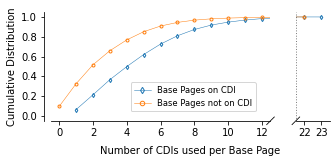

In [18]:
from brokenaxes import brokenaxes


cdf_fig = plt.figure(figsize = (5, 2))
cdf_ax = brokenaxes(xlims=((-0.5,12.5), (21.5,23.5)))

cdf_ax.plot(num_cdn_bp_with_cdn_cdf.xs, num_cdn_bp_with_cdn_cdf.ps,
            label = 'Base Pages on CDI',
            marker = 'd',
            linewidth = 0.5,
            markersize = 3,
            fillstyle = 'none',
            color = 'C0')

cdf_ax.plot(num_cdn_bp_without_cdn_cdf.xs, num_cdn_bp_without_cdn_cdf.ps,
            label = 'Base Pages not on CDI',
            marker = 'o',
            linewidth = 0.5,
            markersize = 3,
            fillstyle = 'none',
            color = 'C1')

cdf_ax.legend(loc = 'lower right', markerscale = 1.5, fontsize = 'small', bbox_to_anchor=(0.75,0.05))

cdf_ax.set_xlabel('Number of CDIs used per Base Page', labelpad=25)
cdf_ax.axs[0].set_ylabel('Cumulative Distribution')
cdf_ax.axs[0].set_ylim([-0.05, 1.05])

cdf_ax.axs[0].yaxis.set_ticks_position('left')
cdf_ax.axs[0].xaxis.set_ticks_position('bottom')
cdf_ax.axs[0].spines['left'].set_position(('axes', -0.03))
cdf_ax.axs[1].spines['left'].set_position(('axes', -0.03))

cdf_ax.axvline(x=12.5, color='black', linestyle=':', linewidth=1, alpha=0.5)
cdf_ax.axvline(x=21.5, color='black', linestyle=':', linewidth=1, alpha=0.5)

yticks = np.arange(0.0, 1.01, 0.2)
cdf_ax.axs[0].set_yticks(yticks)
cdf_ax.axs[1].set_yticks(yticks)

cdf_ax.axs[1].set_xticks([22, 23])

cdf_fig.savefig('[...PATH...]/plots/base-page-plots/num_cdn_per_page.pdf', bbox_inches = 'tight')
plt.show()




In [19]:
with open('[...PATH...]/cdfs/num-cdns.csv', 'w+') as f:
    
    for cdf, label in [
        (num_cdn_bp_with_cdn_cdf, '=== Number of CDIs (BP w/ CDI) ==='),
        (num_cdn_bp_without_cdn_cdf, '=== Number of CDIs (BP w/o CDI) ==='),
        (num_cdn_cdf, '=== Number of CDIs (all) ==='),
    ]:
    
        print(label, file=f)
        for x, y in list(zip(cdf.xs, cdf.ps)):
            print('%.2f; %.5f' % (x, y), file=f)

        print('########################################', file=f)

In [20]:
conn = sqlite3.connect('[...PATH...]/httparchive_processed/2020-01/agg-summaries.db')

In [21]:
mime_types = pd.read_sql('select * from mime_types', con=conn)

In [22]:
conn.close()

In [23]:
# combine 'no type' and 'other' under 'other'
mime_types.loc[10] =  mime_types.loc[6] + mime_types.loc[9] 
mime_types = mime_types.drop(index=[6,9]).reset_index(drop=True)
mime_types['mime_type'] = mime_types['mime_type'].replace('no typeother', 'other')
mime_types['cdn_share'] = mime_types['num_cdn_assets'] / mime_types['num_total_assets']

In [24]:
mime_types

,mime_type,num_cdn_assets,num_total_assets,cdn_share
0,application,6303607,9220762,0.683632
1,audio,265302,426583,0.621924
2,font,14245056,16569827,0.859699
3,html,19590470,28148091,0.695979
4,image,82613713,176660130,0.467642
5,javascript,64223345,100195949,0.640977
6,text,21676628,43017071,0.503908
7,video,1135211,1236756,0.917894
8,other,11864834,16847204,0.704261


In [25]:
mime_types['general_share'] = mime_types['num_total_assets'] / mime_types['num_total_assets'].sum()

In [26]:
mime_types = mime_types.sort_values(by=['general_share', 'cdn_share'], ascending=False).round(4)

In [27]:
mime_types.loc[9] = ['Total',
                     mime_types['num_cdn_assets'].sum(),
                     mime_types['num_total_assets'].sum(),
                     (mime_types['num_cdn_assets'].sum()/mime_types['num_total_assets'].sum()).round(4),
                     1.0
                    ]

In [28]:
mime_types

,mime_type,num_cdn_assets,num_total_assets,cdn_share,general_share
4,image,82613713,176660130,0.4676,0.4503
5,javascript,64223345,100195949,0.6410,0.2554
6,text,21676628,43017071,0.5039,0.1096
3,html,19590470,28148091,0.6960,0.0717
8,other,11864834,16847204,0.7043,0.0429
2,font,14245056,16569827,0.8597,0.0422
0,application,6303607,9220762,0.6836,0.0235
7,video,1135211,1236756,0.9179,0.0032
1,audio,265302,426583,0.6219,0.0011
9,Total,221918166,392322373,0.5657,1.0000


In [29]:
print(mime_types[['mime_type', 'num_cdn_assets', 'cdn_share', 'num_total_assets', 'general_share']
                ].round(3).to_latex(#columns=['mime_type', 'general_share', 'cdn_share'],
                                    index=False,
                                    bold_rows=True)
     )

\begin{tabular}{lrrrr}
\toprule
   mime\_type &  num\_cdn\_assets &  cdn\_share &  num\_total\_assets &  general\_share \\
\midrule
       image &        82613713 &      0.468 &         176660130 &          0.450 \\
  javascript &        64223345 &      0.641 &         100195949 &          0.255 \\
        text &        21676628 &      0.504 &          43017071 &          0.110 \\
        html &        19590470 &      0.696 &          28148091 &          0.072 \\
       other &        11864834 &      0.704 &          16847204 &          0.043 \\
        font &        14245056 &      0.860 &          16569827 &          0.042 \\
 application &         6303607 &      0.684 &           9220762 &          0.024 \\
       video &         1135211 &      0.918 &           1236756 &          0.003 \\
       audio &          265302 &      0.622 &            426583 &          0.001 \\
       Total &       221918166 &      0.566 &         392322373 &          1.000 \\
\bottomrule
\end{tabular}



In [30]:
conn = sqlite3.connect('[...PATH...]/httparchive_processed/2020-01/agg-summaries.db')
mime_types_provider = pd.read_sql('select * from mime_types_provider',
                                  con=conn)
conn.close()

In [31]:
mime_types_provider.columns

Index(['hybrid_ident', 'mime_type', 'num_assets', 'num_total_assets', 'share'], dtype='object')

In [32]:
# combine 'no type' and 'other' under 'other'
mime_types_provider['mime_type'] = mime_types_provider['mime_type'].replace('no type', 'other')
mime_types_provider = mime_types_provider.groupby(['hybrid_ident', 'mime_type']).sum()
mime_types_provider = mime_types_provider.reset_index()
mime_types_provider['share'] = mime_types_provider['num_assets'] / mime_types_provider['num_total_assets']

In [33]:
mime_types_provider.round(5)

,hybrid_ident,mime_type,num_assets,num_total_assets,share
0,,application,2917155,9220762,0.31637
1,,audio,161281,426583,0.37808
2,,font,2324771,16569827,0.14030
3,,html,8557621,28148091,0.30402
4,,image,94046417,176660130,0.53236
...,...,...,...,...,...
671,section.io,html,178556,28148091,0.00634
672,section.io,image,14431,176660130,0.00008
673,section.io,javascript,377097,100195949,0.00376
674,section.io,other,544,16847204,0.00003


In [34]:
mime_types_provider = mime_types_provider.merge(
        mime_types_provider.groupby('mime_type')['num_assets'].nlargest(6).reset_index(),
        left_on=mime_types_provider.index,
        right_on='level_1',
        suffixes=('','_drop')
    ).sort_values(['mime_type', 'num_assets'], ascending=[True, False]
                 )[['mime_type', 'hybrid_ident', 'num_assets', 'num_total_assets', 'share']
                  ]

In [35]:
mime_types_provider

,mime_type,hybrid_ident,num_assets,num_total_assets,share
0,application,,2917155,9220762,0.316368
17,application,Amazon,1714432,9220762,0.185932
44,application,Google,1270236,9220762,0.137758
27,application,Cloudflare,1096816,9220762,0.118951
9,application,Akamai,464996,9220762,0.050429
36,application,Edgecast,435615,9220762,0.047243
1,audio,,161281,426583,0.378076
45,audio,Google,142418,426583,0.333858
28,audio,Cloudflare,57982,426583,0.135922
18,audio,Amazon,30830,426583,0.072272


In [36]:
mtp = mime_types_provider.copy()
mtp['hybrid_ident'].replace({'' : '---', 'Amazon CloudFront' : 'Amazon', 'Microsoft Azure' : 'Microsoft'
                            }, inplace=True)
mtp['comb'] = mtp['hybrid_ident'] + ' (' + mtp['share'].apply(lambda x: x*100).map('{0:.2f}%'.format) + ')'

In [37]:
mtp

,mime_type,hybrid_ident,num_assets,num_total_assets,share,comb
0,application,---,2917155,9220762,0.316368,--- (31.64%)
17,application,Amazon,1714432,9220762,0.185932,Amazon (18.59%)
44,application,Google,1270236,9220762,0.137758,Google (13.78%)
27,application,Cloudflare,1096816,9220762,0.118951,Cloudflare (11.90%)
9,application,Akamai,464996,9220762,0.050429,Akamai (5.04%)
36,application,Edgecast,435615,9220762,0.047243,Edgecast (4.72%)
1,audio,---,161281,426583,0.378076,--- (37.81%)
45,audio,Google,142418,426583,0.333858,Google (33.39%)
28,audio,Cloudflare,57982,426583,0.135922,Cloudflare (13.59%)
18,audio,Amazon,30830,426583,0.072272,Amazon (7.23%)


In [38]:
mtp_top5 = mtp.groupby('mime_type')['comb'].apply(lambda df: df.reset_index(drop=True)).unstack().reset_index()
mtp_top5.columns = [['mime_type', '#1', '#2', '#3', '#4', '#5', '#6']]

In [39]:
mtp_top5

,mime_type,#1,#2,#3,#4,#5,#6
0,application,--- (31.64%),Amazon (18.59%),Google (13.78%),Cloudflare (11.90%),Akamai (5.04%),Edgecast (4.72%)
1,audio,--- (37.81%),Google (33.39%),Cloudflare (13.59%),Amazon (7.23%),CDN77 (2.86%),Edgecast (2.10%)
2,font,Google (65.26%),--- (14.03%),Akamai (7.21%),Highwinds (2.98%),Amazon (2.76%),Cloudflare (2.75%)
3,html,Google (36.30%),--- (30.40%),Amazon (10.81%),Facebook (6.54%),Akamai (4.80%),Cloudflare (3.80%)
4,image,--- (53.24%),Google (11.85%),Amazon (8.76%),Cloudflare (7.40%),Akamai (3.65%),Facebook (3.19%)
5,javascript,--- (35.90%),Google (22.54%),Amazon (9.67%),Cloudflare (7.68%),Facebook (7.55%),Akamai (4.58%)
6,other,Amazon (30.60%),--- (29.57%),Google (21.20%),Fastly (4.43%),Cloudflare (3.91%),Akamai (3.34%)
7,text,--- (49.61%),Google (15.93%),Cloudflare (7.81%),Amazon (7.67%),Facebook (4.07%),Akamai (2.40%)
8,video,Facebook (59.20%),Google (21.11%),--- (8.21%),Akamai (4.73%),Amazon (2.40%),Cloudflare (1.10%)


In [40]:
print(mtp_top5.to_latex(index=False, bold_rows=True
    )
)

\begin{tabular}{lllllll}
\toprule
   mime\_type &                 \#1 &               \#2 &                   \#3 &                   \#4 &                  \#5 &                  \#6 \\
\midrule
 application &       --- (31.64\%) &  Amazon (18.59\%) &      Google (13.78\%) &  Cloudflare (11.90\%) &      Akamai (5.04\%) &    Edgecast (4.72\%) \\
       audio &       --- (37.81\%) &  Google (33.39\%) &  Cloudflare (13.59\%) &       Amazon (7.23\%) &       CDN77 (2.86\%) &    Edgecast (2.10\%) \\
        font &    Google (65.26\%) &     --- (14.03\%) &       Akamai (7.21\%) &    Highwinds (2.98\%) &      Amazon (2.76\%) &  Cloudflare (2.75\%) \\
        html &    Google (36.30\%) &     --- (30.40\%) &      Amazon (10.81\%) &     Facebook (6.54\%) &      Akamai (4.80\%) &  Cloudflare (3.80\%) \\
       image &       --- (53.24\%) &  Google (11.85\%) &       Amazon (8.76\%) &   Cloudflare (7.40\%) &      Akamai (3.65\%) &    Facebook (3.19\%) \\
  javascript &       --- (35.90\%) &  Google

In [41]:
import matplotlib.patches as mpatches

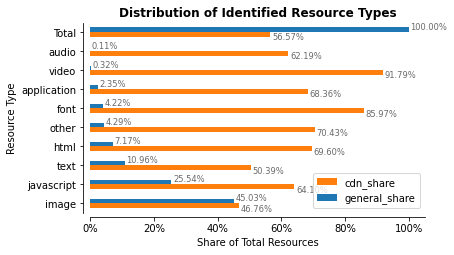

In [42]:
atc_fig, atc_ax = plt.subplots(figsize=(6,3.5))

mime_types.plot(kind='barh', x='mime_type', y=['cdn_share', 'general_share'], ax=atc_ax,
               color=['C1', 'C0'])

atc_ax.grid(False)
atc_ax.spines['right'].set_color('none')
atc_ax.spines['top'].set_color('none')
atc_ax.yaxis.set_ticks_position('left')
atc_ax.xaxis.set_ticks_position('bottom')
atc_ax.spines['bottom'].set_position(('axes', -0.02))
atc_ax.spines['left'].set_position(('axes', -0.02))

atc_ax.set_xlabel('Share of Total Resources')
atc_ax.set_ylabel('Resource Type')
atc_ax.set_title('Distribution of Identified Resource Types', fontweight='bold')


for i, p in zip(range(len(atc_ax.patches)), atc_ax.patches):
    if i < len(atc_ax.patches)/2:
        offset = -0.155
    else:
        offset = 0.135
    atc_ax.text(p.get_width()+.005, p.get_y()+offset,
                '{0:.2f}%'.format(p.get_width()*100), fontsize='small',
                        color='dimgrey')

atc_ax.xaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))


In [43]:
conn = sqlite3.connect('[...PATH...]/httparchive_processed/2020-01/agg-summaries.db')
cdn_distribution = pd.read_sql('select * from cdn_provider_distribution', con=conn)
conn.close()

In [44]:
cdn_distribution.head(10).round(4)

,cdn,num_assets,share_total,share_cdn_assets
0,Google,76643539,0.1954,0.3454
1,Amazon,38885034,0.0991,0.1752
2,Cloudflare,27486460,0.0701,0.1239
3,Facebook,17714255,0.0452,0.0798
4,Akamai,15701880,0.0400,0.0708
5,Fastly,10780916,0.0275,0.0486
6,WordPress,4139907,0.0106,0.0187
7,Twitter,3950271,0.0101,0.0178
8,Microsoft,3813807,0.0097,0.0172
9,NetDNA,3600997,0.0092,0.0162


In [45]:
cdn_distribution.head(6).sum()

cdn                 GoogleAmazonCloudflareFacebookAkamaiFastly
num_assets                                           187212084
share_total                                            0.47719
share_cdn_assets                                       0.84361
dtype: object

In [46]:
cdn_distribution.head(2).sum()

cdn                 GoogleAmazon
num_assets             115528573
share_total              0.29448
share_cdn_assets         0.52059
dtype: object

In [47]:
cdn_distribution

,cdn,num_assets,share_total,share_cdn_assets
0,Google,76643539,0.19536,0.34537
1,Amazon,38885034,0.09912,0.17522
2,Cloudflare,27486460,0.07006,0.12386
3,Facebook,17714255,0.04515,0.07982
4,Akamai,15701880,0.04002,0.07076
...,...,...,...,...
81,Rev Software,217,0.00000,0.00000
82,SwiftyCDN,195,0.00000,0.00000
83,Zycada Networks,192,0.00000,0.00000
84,Bison Grid,153,0.00000,0.00000


In [48]:
print(
    cdn_distribution.head(10).round(3).to_latex(columns=['cdn', 
                                                 'num_assets',
                                                 'share_cdn_assets',
                                                 'share_total'],
                                        index=False, bold_rows=True
    )
)

\begin{tabular}{lrrr}
\toprule
        cdn &  num\_assets &  share\_cdn\_assets &  share\_total \\
\midrule
     Google &    76643539 &             0.345 &        0.195 \\
     Amazon &    38885034 &             0.175 &        0.099 \\
 Cloudflare &    27486460 &             0.124 &        0.070 \\
   Facebook &    17714255 &             0.080 &        0.045 \\
     Akamai &    15701880 &             0.071 &        0.040 \\
     Fastly &    10780916 &             0.049 &        0.027 \\
  WordPress &     4139907 &             0.019 &        0.011 \\
    Twitter &     3950271 &             0.018 &        0.010 \\
  Microsoft &     3813807 &             0.017 &        0.010 \\
     NetDNA &     3600997 &             0.016 &        0.009 \\
\bottomrule
\end{tabular}



In [49]:
obj_size = pd.read_csv('[...PATH...]/obj-sizes-2020.csv')

In [50]:
# normalize names for Amazon and Microsoft

cf_ms_names = {'Amazon CloudFront' : 'Amazon',
               'Microsoft Azure' : 'Microsoft',
               np.nan : '---'}

obj_size['hybrid_ident'] = obj_size['hybrid_ident'].replace(cf_ms_names)

In [51]:
obj_size = obj_size.rename(columns={'sum_sizes' : 'bytes'})

In [52]:
obj_size = obj_size.groupby('hybrid_ident').sum().reset_index().sort_values('bytes', ascending=False)

In [53]:
obj_size['gigabytes'] = obj_size['bytes']/1024/1024/1024

In [54]:
obj_size['gigabytes'].sum()/1024

13.16813219785763

In [55]:
obj_size['bytes'].sum()

14478514467636.0

In [56]:
obj_size[obj_size['hybrid_ident'] != '---']['bytes'].sum()

6698446609367.0

In [57]:
obj_size[obj_size['hybrid_ident'] != '---']['bytes'].sum() / obj_size['bytes'].sum()

0.46264736788709365

In [58]:
obj_size['cdn_share'] = obj_size['bytes'] / obj_size[obj_size['hybrid_ident'] != '---']['bytes'].sum()
obj_size['total_share'] = obj_size['bytes'] / obj_size['bytes'].sum()

In [59]:
obj_size.round(3)

,hybrid_ident,bytes,gigabytes,cdn_share,total_share
0,---,7.780068e+12,7245.753,1.161,0.537
30,Google,1.605106e+12,1494.871,0.240,0.111
5,Amazon,1.371403e+12,1277.219,0.205,0.095
24,Cloudflare,1.026878e+12,956.354,0.153,0.071
4,Akamai,5.333766e+11,496.746,0.080,0.037
...,...,...,...,...,...
83,Zycada Networks,6.949852e+06,0.006,0.000,0.000
11,Bison Grid,3.626912e+06,0.003,0.000,0.000
59,Reapleaf,3.621424e+06,0.003,0.000,0.000
70,SwiftyCDN,2.983432e+06,0.003,0.000,0.000


In [60]:
cdn_dist = cdn_distribution.head(10).merge(obj_size.rename(columns={'hybrid_ident' : 'cdn',
                                                                    'cdn_share' : 'size_share_cdn',
                                                                    'total_share' : 'size_share_total'}
                                                          ), how='left', on='cdn')

In [61]:
cdn_dist

,cdn,num_assets,share_total,share_cdn_assets,bytes,gigabytes,size_share_cdn,size_share_total
0,Google,76643539,0.19536,0.34537,1.605106e+12,1494.871246,0.239624,0.110861
1,Amazon,38885034,0.09912,0.17522,1.371403e+12,1277.218804,0.204735,0.094720
2,Cloudflare,27486460,0.07006,0.12386,1.026878e+12,956.354347,0.153301,0.070924
3,Facebook,17714255,0.04515,0.07982,4.545967e+11,423.376183,0.067866,0.031398
4,Akamai,15701880,0.04002,0.07076,5.333766e+11,496.745675,0.079627,0.036839
5,Fastly,10780916,0.02748,0.04858,4.415775e+11,411.251099,0.065922,0.030499
6,WordPress,4139907,0.01055,0.01866,1.174001e+11,109.337337,0.017526,0.008109
7,Twitter,3950271,0.01007,0.01780,7.060758e+10,65.758436,0.010541,0.004877
8,Microsoft,3813807,0.00972,0.01719,1.943458e+11,180.998637,0.029014,0.013423
9,NetDNA,3600997,0.00918,0.01623,1.594049e+11,148.457411,0.023797,0.011010


In [62]:
print(
    cdn_dist.head(10).round(3).to_latex(columns=['cdn', 
                                                 'num_assets', 'gigabytes', 
                                                 'share_cdn_assets', 'size_share_cdn',
                                                 'share_total', 'size_share_total'],
                                        index=False, bold_rows=True
    )
)

\begin{tabular}{lrrrrrr}
\toprule
        cdn &  num\_assets &  gigabytes &  share\_cdn\_assets &  size\_share\_cdn &  share\_total &  size\_share\_total \\
\midrule
     Google &    76643539 &   1494.871 &             0.345 &           0.240 &        0.195 &             0.111 \\
     Amazon &    38885034 &   1277.219 &             0.175 &           0.205 &        0.099 &             0.095 \\
 Cloudflare &    27486460 &    956.354 &             0.124 &           0.153 &        0.070 &             0.071 \\
   Facebook &    17714255 &    423.376 &             0.080 &           0.068 &        0.045 &             0.031 \\
     Akamai &    15701880 &    496.746 &             0.071 &           0.080 &        0.040 &             0.037 \\
     Fastly &    10780916 &    411.251 &             0.049 &           0.066 &        0.027 &             0.030 \\
  WordPress &     4139907 &    109.337 &             0.019 &           0.018 &        0.011 &             0.008 \\
    Twitter &     3950271 &  

In [63]:
cdn_dist.head(6).sort_values('size_share_cdn', ascending=False)

,cdn,num_assets,share_total,share_cdn_assets,bytes,gigabytes,size_share_cdn,size_share_total
0,Google,76643539,0.19536,0.34537,1.605106e+12,1494.871246,0.239624,0.110861
1,Amazon,38885034,0.09912,0.17522,1.371403e+12,1277.218804,0.204735,0.094720
2,Cloudflare,27486460,0.07006,0.12386,1.026878e+12,956.354347,0.153301,0.070924
4,Akamai,15701880,0.04002,0.07076,5.333766e+11,496.745675,0.079627,0.036839
3,Facebook,17714255,0.04515,0.07982,4.545967e+11,423.376183,0.067866,0.031398
5,Fastly,10780916,0.02748,0.04858,4.415775e+11,411.251099,0.065922,0.030499
